In [2]:
import scanpy as sc
import palantir
import pickle

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import os

In [6]:
import matplotlib

In [8]:
import matplotlib.pyplot as plt

In [ ]:
adata = sc.read('pb_12_donors_pseudotime.h5ad')

In [116]:
scvi_projection = adata.obsm['X_scANVI']

In [117]:
scvi_projection = pd.DataFrame(scvi_projection)

In [132]:
dm_res = palantir.utils.run_diffusion_maps(scvi_projection, n_components=5)

In [260]:
ms_data = palantir.utils.determine_multiscale_space(dm_res, n_eigs=None)

In [262]:
start_cell = 17958
pr_res = palantir.core.run_palantir(ms_data, start_cell, num_waypoints=500)

Sampling and flocking waypoints...
Time for determining waypoints: 0.028515048821767173 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.2485592524210612 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9997
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


(<Figure size 320x320 with 1 Axes>, <Axes: >)

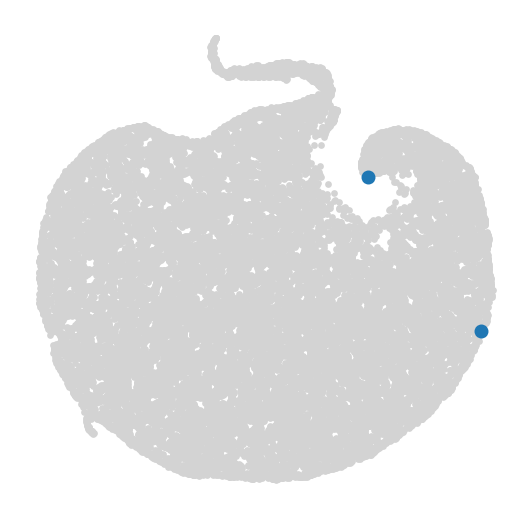

In [168]:
palantir.plot.highlight_cells_on_tsne(umap_em, [10017, 13850])

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

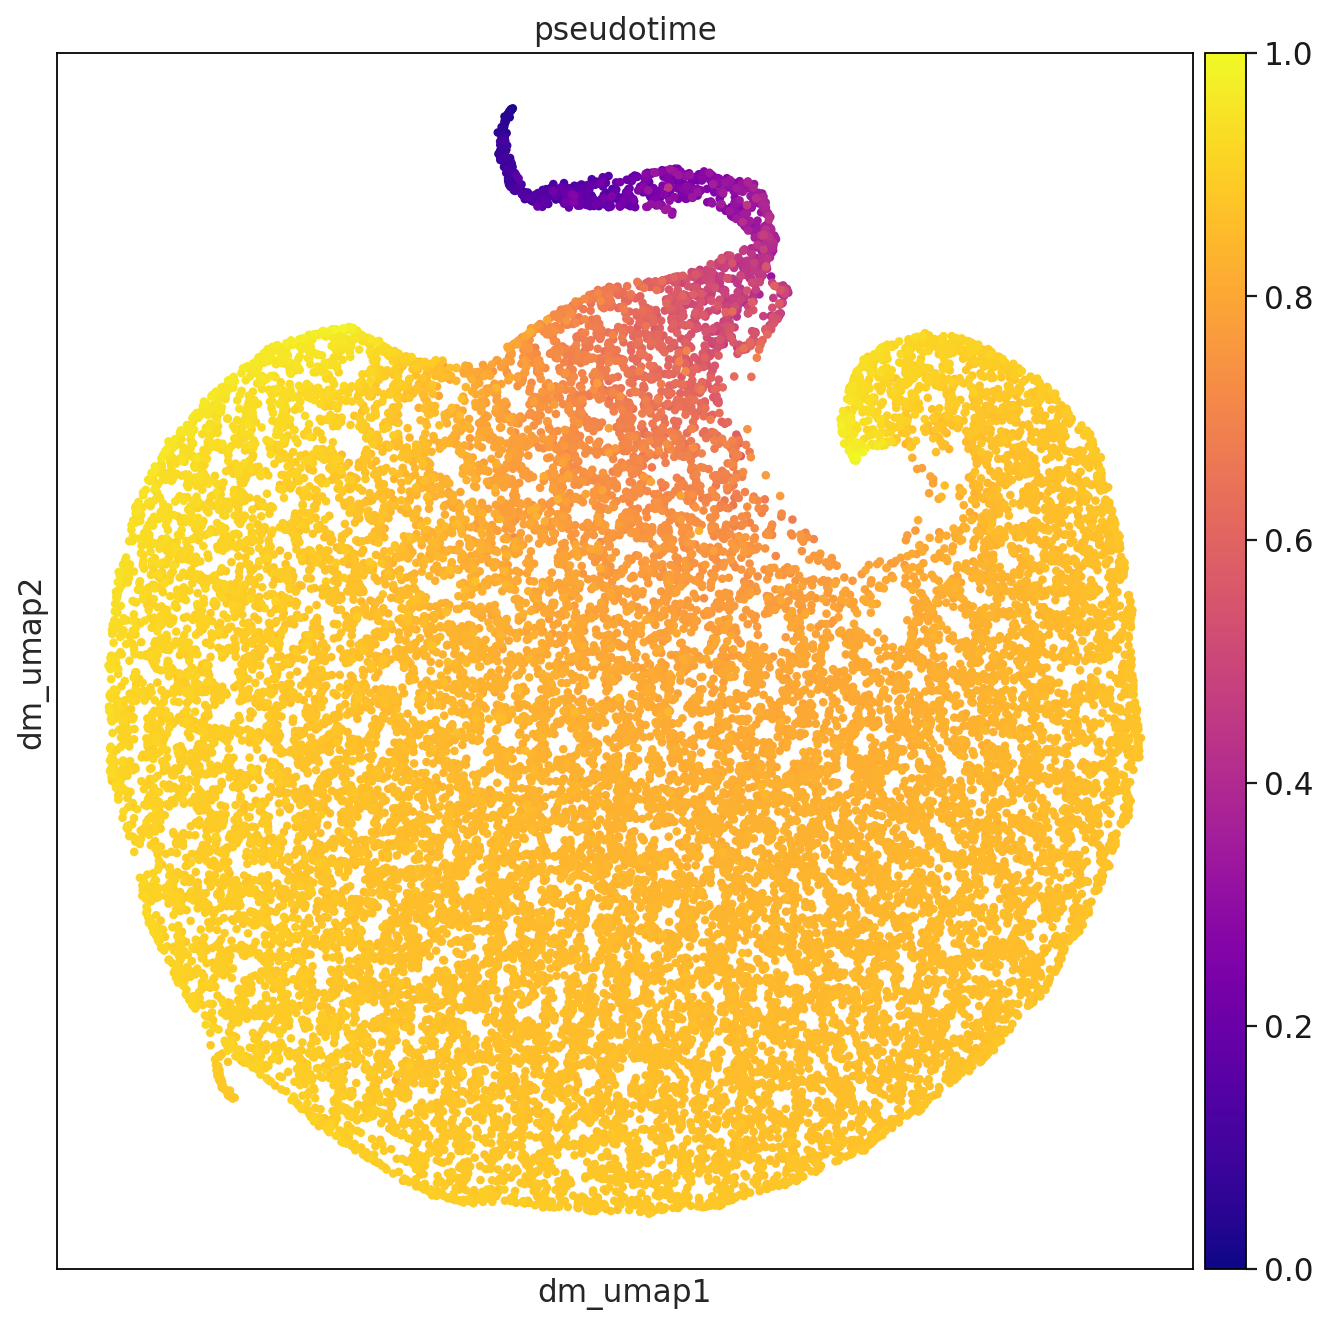

In [238]:
sc.pl.embedding(adata, basis='dm_umap', color='pseudotime', cmap=matplotlib.cm.plasma, s=60)

In [ ]:
gene_trends = palantir.presults.compute_gene_trends(
    adata
)

In [23]:
gene_trends['CD57+'] = gene_trends[13850]

In [24]:
gene_trends['Adaptive'] = gene_trends[10017]

In [25]:
del gene_trends[13850]
del gene_trends[10017]